In [21]:
import numpy as np

# Apenas para plotar gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

In [23]:
def tanh(x):
  return np.tanh(x)

def tanh_derivate(x):
  return 1 - np.tanh(x)**2

def loss_fn(y_pred, y_true):
  return np.mean((y_pred - y_true)**2)

def d_loss_y_pred(y_pred, y_true):
  return 2 * (y_pred - y_true) / y_true.size

In [73]:
np.random.seed(42)
'''
# Pesos entre camada de input e a oculta -> W1
W1 = np.random.randn(1,10) * 0.1
b1 = np.zeros((1,10))

# Pesos entre camada de oculta e a saída -> W2
W2 = np.random.randn(10,1) * 0.1
b2 = np.zeros((1,1))
'''

# Pesos entre camada de input e a oculta -> W1
# A inicialização com valores aleatórios estava extendendo muito o número de épocas
# o uso da técinica: Xavier/Glorot Initialization busca iniciar já com bons pesos
n_in_W1 = 1
n_out_W1 = 20
std_dev_W1 = np.sqrt(2 / (n_in_W1 + n_out_W1))
W1 = np.random.randn(n_in_W1, n_out_W1) * std_dev_W1
b1 = np.zeros((1, n_out_W1))

# Pesos entre camada de oculta e a saída -> W2
n_in_W2 = 20
n_out_W2 = 1
std_dev_W2 = np.sqrt(2 / (n_in_W2 + n_out_W2))
W2 = np.random.randn(n_in_W2, n_out_W2) * std_dev_W2
b2 = np.zeros((1, n_out_W2))


In [5]:
# x é a entrada na rede
def forward(x):
  z1 = x @ W1 + b1
  ativ = tanh(z1)
  z2 = ativ @ W2 + b2
  y_pred = z2
  return y_pred, z1, ativ, z2

In [27]:
def backprop(current_lr):
  global W1, b1, W2, b2
  # backpropagation

  # learning rate

  # Gradiente para W2 e b2

  dW2 = ativ.T @ d_loss_y_pred(y_pred, y_true) #ativ.T é a transposta da ativação da camada anterior (L-1)
  db2 = np.sum(d_loss_y_pred(y_pred, y_true), axis=0, keepdims=True)

  # propagar o erro para a camada oculta
  d_ativ = d_loss_y_pred(y_pred, y_true) @ W2.T  # é a somatório dos pesos*delta desse neurônio da próxima camada

  # derivada da tanh
  #d_tanh = 1 - np.tanh(z1) ** 2

  # gradiente da camada oculta
  delta1 = d_ativ * tanh_derivate(z1) # é o δj(L) da camada interna

  # gradientes para W1 e b1
  dW1 = x.T @ delta1
  db1 = np.sum(delta1, axis=0, keepdims=True)

  #atualização dos pessos

  W2 -= current_lr * dW2
  b2 -= current_lr * db2

  W1 -= current_lr * dW1
  b1 -= current_lr * db1



In [74]:
batch_size = 64
initial_lr = 0.08
current_lr = initial_lr
decay_rate = 0.99999  # mais suave né tava mt agressivo kk
summing_loss = 0
mean_loss_atual = 1
mean_loss_anterior = 1
gaap_view = 500
loss_history = []
tolerancia = 1e-6
fine_tuning_multiplier = 1

for epoch in range(1_000_000):
  if current_lr > 0.00001 :
    current_lr = initial_lr * (decay_rate ** epoch) * fine_tuning_multiplier

  x = np.random.uniform(-np.pi, np.pi, size=(batch_size, 1))
  y_true = np.sin(x)

  y_pred, z1, ativ, z2 = forward(x)
  error = loss_fn(y_pred, y_true)
  summing_loss += error

  backprop(current_lr)


  if epoch % gaap_view == 0:
    mean_loss_atual = summing_loss/gaap_view
    summing_loss = 0
    print(f"Epoch {epoch}, Mean loss: {mean_loss_atual:.8f}, Lr: {current_lr:.8f}")
    loss_history.append(mean_loss_atual)

    mean_loss_anterior = mean_loss_atual
  
  
    last_loss = loss_history[-10:]
    dif_max = max(last_loss) - min(last_loss)

    if epoch > 50_000 and dif_max < tolerancia:
      print(" - on Fine Tuning")
      fine_tuning_multiplier = 0.5
    else: 
      fine_tuning_multiplier = 1 

  if epoch > 10 and mean_loss_atual < 0.000001:
    print(f"Convergiu na epoch {epoch} com Loss {mean_loss_atual:8f} ")
    break




Epoch 0, Mean loss: 0.00171898, Lr: 0.08000000
Epoch 500, Mean loss: 0.02588014, Lr: 0.07960100
Epoch 1000, Mean loss: 0.00744101, Lr: 0.07920398
Epoch 1500, Mean loss: 0.00557006, Lr: 0.07880895
Epoch 2000, Mean loss: 0.00460899, Lr: 0.07841589
Epoch 2500, Mean loss: 0.00431810, Lr: 0.07802478
Epoch 3000, Mean loss: 0.00514031, Lr: 0.07763563
Epoch 3500, Mean loss: 0.00447847, Lr: 0.07724842
Epoch 4000, Mean loss: 0.00652981, Lr: 0.07686314
Epoch 4500, Mean loss: 0.00557374, Lr: 0.07647978
Epoch 5000, Mean loss: 0.00480033, Lr: 0.07609833
Epoch 5500, Mean loss: 0.00567725, Lr: 0.07571879
Epoch 6000, Mean loss: 0.00564495, Lr: 0.07534114
Epoch 6500, Mean loss: 0.00417661, Lr: 0.07496537
Epoch 7000, Mean loss: 0.00602439, Lr: 0.07459148
Epoch 7500, Mean loss: 0.00454680, Lr: 0.07421945
Epoch 8000, Mean loss: 0.00611778, Lr: 0.07384928
Epoch 8500, Mean loss: 0.00315187, Lr: 0.07348095
Epoch 9000, Mean loss: 0.00498268, Lr: 0.07311446
Epoch 9500, Mean loss: 0.00501400, Lr: 0.07274980
Epoc

In [75]:
x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y_true = np.sin(x_test)
y_pred, *_ = forward(x_test)

error = loss_fn(y_pred, y_true)
print(f"Erro de teste: {error}")

Erro de teste: 4.591626470517918e-06


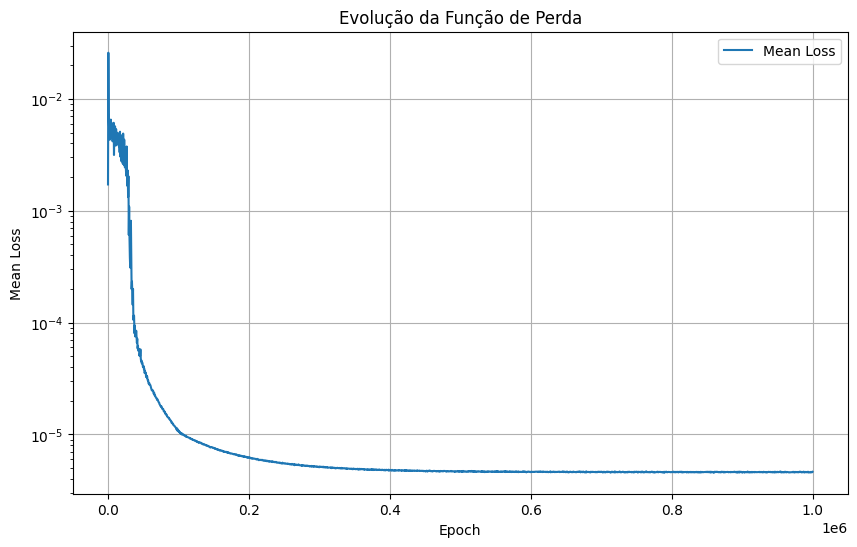

In [76]:

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(loss_history)*500, 500), loss_history, label='Mean Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Evolução da Função de Perda')
plt.yscale('log')  # Opcional: escala logarítmica para ver detalhes
plt.grid(True)
plt.legend()
plt.show()
# Depois que a perda alcançou 0.00000199 na epoca 132500 só abaixou para 0.0000001 295500 épocas depois
# não compensa, o aprendizado diminuiu demais nessa parte.

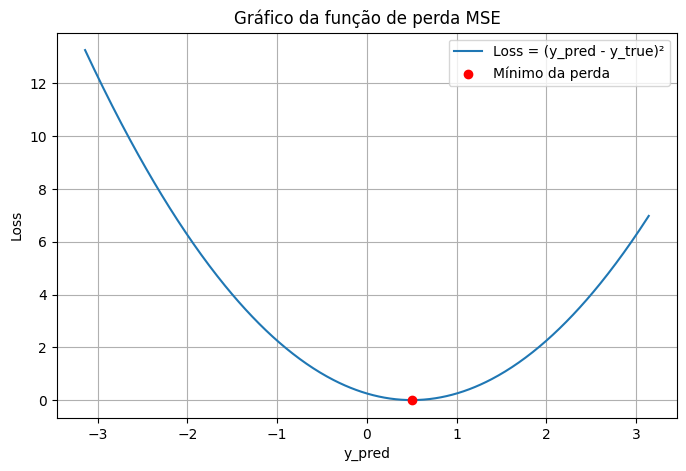

In [10]:
y_true = 0.5
y_pred = np.linspace(-np.pi, np.pi, 500)

loss = (y_pred - y_true) ** 2  # ou usar loss_fn(y_pred, y_true)

# Plotar
plt.figure(figsize=(8, 5))
plt.plot(y_pred, loss, label='Loss = (y_pred - y_true)²')
plt.scatter([y_true], [0], color='red', label='Mínimo da perda', zorder=5)
plt.xlabel('y_pred')
plt.ylabel('Loss')
plt.title('Gráfico da função de perda MSE')
plt.grid(True)
plt.legend()
plt.show()

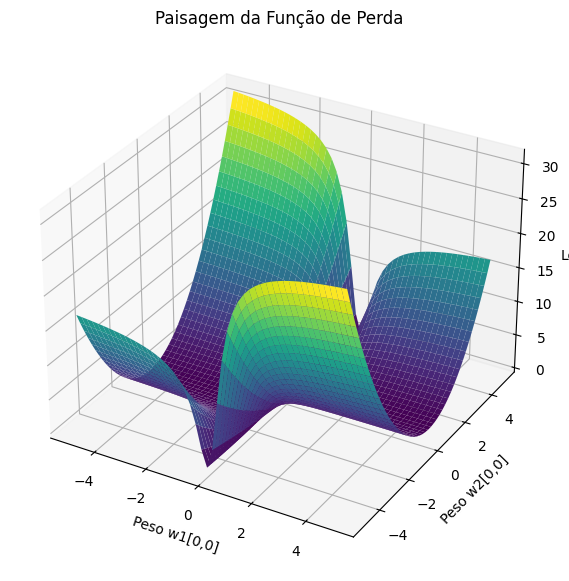

In [11]:
# Fixe um conjunto de entrada para o teste
x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y_test = np.sin(x_test)

# Defina as faixas dos dois pesos que quer variar
w1_range = np.linspace(-5, 5, 50)
w2_range = np.linspace(-5, 5, 50)

# Matriz para armazenar os valores de perda
loss_surface = np.zeros((len(w1_range), len(w2_range)))

# Salve os pesos originais para restaurar depois
original_w1 = W1[0, 0]
original_w2 = W2[0, 0]

# Loop para calcular a perda para cada combinação de pesos
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        # Ajusta os pesos
        W1[0, 0] = w1_val
        W2[0, 0] = w2_val

        # Forward pass com pesos modificados
        y_pred, *_ = forward(x_test)

        # Calcula a perda
        loss_surface[i, j] = loss_fn(y_pred, y_test)

# Restaura os pesos originais
W1[0, 0] = original_w1
W2[0, 0] = original_w2

# Cria a malha para plotar
W1, W2 = np.meshgrid(w1_range, w2_range)

# Plot 3D da superfície de perda
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(W1, W2, loss_surface.T, cmap='viridis')

ax.set_xlabel('Peso w1[0,0]')
ax.set_ylabel('Peso w2[0,0]')
ax.set_zlabel('Loss')

plt.title('Paisagem da Função de Perda')
plt.show()

In [17]:
fig = go.Figure(data=[go.Surface(z=loss_surface.T, x=W1, y=W2, colorscale='Viridis')])

fig.update_layout(
    title='Paisagem da Função de Perda',
    scene = dict(
        xaxis_title='Peso w1[0,0]',
        yaxis_title='Peso w2[0,0]',
        zaxis_title='Loss'
    )
)

fig.show()

In [41]:
num_tests = 10

for _ in range(num_tests):
  valor = np.random.uniform(-np.pi, np.pi, size=(1, 1))
  x = np.array(valor)
  y_pred, _, _, _ = forward(x)

  print(f"input: {valor[0][0]:.4f}" )
  print(f"Predição: {y_pred[0][0]:.4f}")
  print(f"sin({valor[0][0]:.4f}): {np.sin(valor)[0][0]:.4f}")
  print("-" * 20)

input: 2.9708
Predição: 0.1704
sin(2.9708): 0.1700
--------------------
input: 1.9963
Predição: 0.9113
sin(1.9963): 0.9108
--------------------
input: -1.8504
Predição: -0.9625
sin(-1.8504): -0.9612
--------------------
input: -0.8611
Predição: -0.7571
sin(-0.8611): -0.7586
--------------------
input: -1.5989
Predição: -1.0012
sin(-1.5989): -0.9996
--------------------
input: 2.3890
Predição: 0.6828
sin(2.3890): 0.6835
--------------------
input: -0.9976
Predição: -0.8385
sin(-0.9976): -0.8402
--------------------
input: 1.0033
Predição: 0.8423
sin(1.0033): 0.8432
--------------------
input: -2.4702
Predição: -0.6203
sin(-2.4702): -0.6221
--------------------
input: 2.9697
Predição: 0.1715
sin(2.9697): 0.1711
--------------------
